# Introduction to ROOT with uproot

Hello everyone! In this notebook we will go through how to open a ROOT file using uproot, pick up data from a TBranch within a TTree, and plot that data using matplotlib. 


First we need to import the necessary packages: 
- uproot will be used to interface with the ROOT data files provided by the ATLAS experiment. Documentation can be found here: https://uproot.readthedocs.io/en/latest/ 
- numpy will be used to perform mathematical operations on arrays
- matplotlib will be used to plot our distributions

In [73]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

Let's open the data file. Change the path set equal to inFileName to the location of your data file. Then use uproot.open to open the data file. It will open the file into a dictionary format. 

In [10]:
inFileName = "../Data/ATLAS/data_A.exactly2lep.root"
file = uproot.open(inFileName)

If we've never interacted with the dataset we should take a look at what is there. 

- ROOT files are generally organized into "TTrees" and "TBranches". 
- A TTree is a container for the TBranches, while the TBranches contain the actual data. 

In the loop below we are inspecting the file opened in the last line above. 

In [30]:
# Check out what is inside of the file
for eNum, event in file.items():
    print("Tree Name: {}".format(eNum))
    print("Branches")
    print("-------------")
    for tName, tree in event.items():
        print(tName)
        for bName, branch in tree.items():
            print(branch.keys())
    print("-------------")

Tree Name: b'mini;1'
Branches
-------------
b'runNumber'
b'eventNumber'
b'channelNumber'
b'mcWeight'
b'scaleFactor_PILEUP'
b'scaleFactor_ELE'
b'scaleFactor_MUON'
b'scaleFactor_PHOTON'
b'scaleFactor_TAU'
b'scaleFactor_BTAG'
b'scaleFactor_LepTRIGGER'
b'scaleFactor_PhotonTRIGGER'
b'trigE'
b'trigM'
b'trigP'
b'lep_n'
b'lep_truthMatched'
b'lep_trigMatched'
b'lep_pt'
b'lep_eta'
b'lep_phi'
b'lep_E'
b'lep_z0'
b'lep_charge'
b'lep_type'
b'lep_isTightID'
b'lep_ptcone30'
b'lep_etcone20'
b'lep_trackd0pvunbiased'
b'lep_tracksigd0pvunbiased'
b'met_et'
b'met_phi'
b'jet_n'
b'jet_pt'
b'jet_eta'
b'jet_phi'
b'jet_E'
b'jet_jvt'
b'jet_trueflav'
b'jet_truthMatched'
b'jet_MV2c10'
b'photon_n'
b'photon_truthMatched'
b'photon_trigMatched'
b'photon_pt'
b'photon_eta'
b'photon_phi'
b'photon_E'
b'photon_isTightID'
b'photon_ptcone30'
b'photon_etcone20'
b'photon_convType'
b'tau_n'
b'tau_pt'
b'tau_eta'
b'tau_phi'
b'tau_E'
b'tau_isTightID'
b'tau_truthMatched'
b'tau_trigMatched'
b'tau_nTracks'
b'tau_BDTid'
b'ditau_m'
b'le

The name of the tree is "mini". As you can see above, there are several different branches for the tree mini. Some of the branch names might look weird to you. Each branch contains some measurable quantity that we may be interested in. 

Let's pick up the lepton transverse momentum (pt) data. For funny reasons (taus are complicated), lepton often refers to an electron or muon in our data.

In [70]:
tree    = b'mini;1' 
branch  = b'lep_pt'
lep_pt = file[tree].array(branch)
n_lep   = len(lep_pt) 
print("There are {} dilepton events in this sample!".format(n_lep))

There are 664613 dilepton events in this sample!


Now that we have the data let's make a plot. We'll first make a function to produce matplotlib figures that we can reuse to make other plots. Defining functions in this way will be a useful way for you to not repeat code.

In [75]:
def make_fig(xTitle="xTitle",yTitle="yTitle"):
    fig = plt.figure(figsize=(15,10))

    ax = plt.gca()
    ax.set_prop_cycle(color=['#002BFF','#A15FFF','#FF0061','#FF8913'])
    ax.set_xlabel(xTitle,fontsize=26,labelpad=6)
    ax.set_ylabel(yTitle,fontsize=26)
    ax.tick_params(labelsize=18, direction='out', length=8, width=2)
    ax.yaxis.offsetText.set_fontsize(18)
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
    ax.tick_params(axis='both', which='major', labelsize=25)
    
    return fig, ax

Finally let's plot the distribution! In particle physics, we often plot data in histograms.

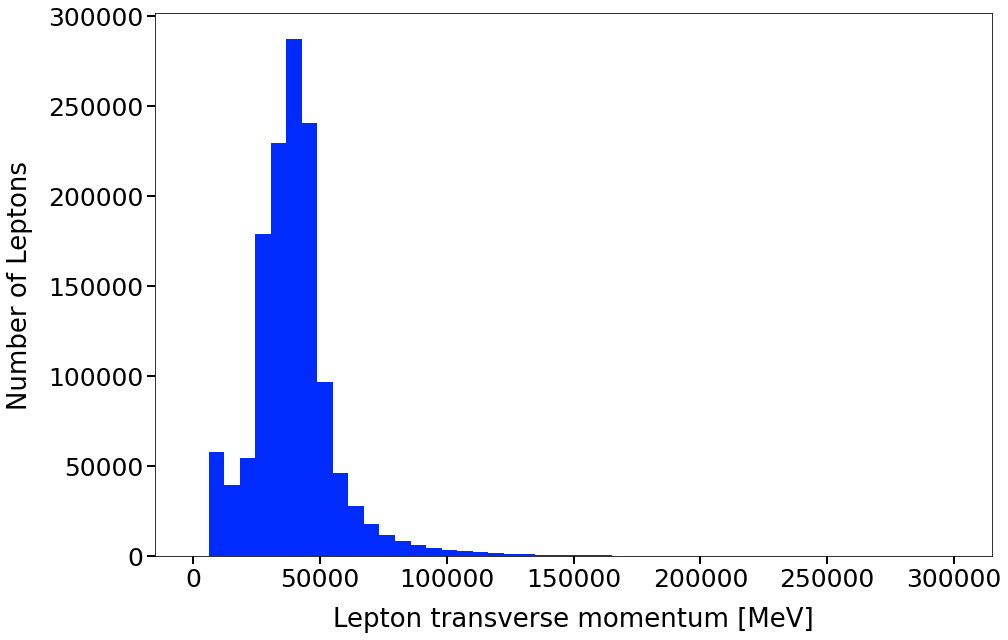

In [74]:
xtitle  = "Lepton transverse momentum [MeV]"
ytitle  = "Number of Leptons"
fig, ax = make_fig(xTitle=xtitle,yTitle=ytitle)
nbins   = 50 # number of bins in histogram
xlow    = 0
xhigh   = 300000
bins    = np.linspace(xlow, xhigh,nbins)
n, bins, patches = ax.hist(lep_pt.flatten(), bins)

The measurable quantity, lepton transverse momentum, is divided into "bins" on the x-axis. Each bin here has a width of 6000 MeV. The y-axis of the bin shows the number of leptons which fall in each bin. The size of the bin is important - if it's too big, it might hide features, but if it's too small, the number of leptons in each bin will have a large statistical uncertainty. Pick your bin size wisely! 